In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('GlobalWeatherRepository.csv')

In [3]:
df_cleaned = df.drop_duplicates()
df_cleaned.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,8376.000000,8376.000000,8.376000e+03,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,...,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000
mean,19.301712,21.900500,1.695078e+09,22.200549,71.961509,6.682533,10.755146,164.204274,1013.889565,29.939226,...,17.169031,531.334348,41.385757,11.256793,6.524152,22.350979,37.203713,1.517192,2.169651,55.812321
std,24.584147,65.677178,1.067515e+06,6.873125,12.371939,4.772097,7.680980,104.505324,6.026160,0.177863,...,10.937173,1266.462746,32.188229,20.140792,14.430969,63.032969,93.831422,0.948181,2.286624,34.917097
min,-41.300000,-175.200000,1.693301e+09,-5.000000,23.000000,2.200000,3.600000,1.000000,982.000000,29.000000,...,0.000000,96.800000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,0.000000
25%,3.750000,-6.840000,1.694128e+09,17.000000,62.600000,3.100000,5.000000,74.000000,1010.000000,29.830000,...,9.000000,223.600000,18.100000,1.100000,0.400000,3.200000,5.700000,1.000000,1.000000,22.000000
50%,17.250000,23.240000,1.695076e+09,23.000000,73.400000,5.600000,9.000000,160.000000,1013.000000,29.910000,...,15.100000,273.700000,37.200000,3.900000,1.500000,8.000000,13.500000,1.000000,1.000000,60.000000
75%,41.330000,50.580000,1.696024e+09,27.000000,80.600000,9.400000,15.100000,250.000000,1018.000000,30.060000,...,22.800000,433.900000,57.900000,12.225000,5.700000,19.900000,32.125000,2.000000,2.000000,91.000000
max,63.830000,179.220000,1.696886e+09,45.000000,113.000000,87.700000,141.100000,360.000000,1036.000000,30.590000,...,110.500000,36315.898000,320.400000,329.000000,169.800000,1558.800000,2504.300000,6.000000,10.000000,100.000000


In [4]:
columns_for_outliers = ['temperature_celsius', 'temperature_fahrenheit', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'wind_mph', 'wind_kph', 'pressure_mb', 'pressure_in']
threshold = 1.5
outliers = {}
for col in columns_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] # Removal of outliers
df_cleaned.shape


(8294, 41)

In [5]:
columns_for_float = ['temperature_celsius', 'temperature_fahrenheit', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'wind_mph', 'wind_kph', 'pressure_in', 'feels_like_celsius', 'feels_like_fahrenheit', 'gust_mph', 'gust_kph']
for i in columns_for_float:
    df_cleaned[i] = df_cleaned[i].astype(float)

columns_for_int = ['wind_degree', 'pressure_mb', 'humidity', 'cloud', 'visibility_km', 'visibility_miles', 'uv_index', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination']
for i in columns_for_int:
    df_cleaned[i] = df_cleaned[i].astype(int)

/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/2914113855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[i] = df_cleaned[i].astype(float)
/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/2914113855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[i] = df_cleaned[i].astype(int)


In [6]:
df_cleaned['DewPoint'] = df_cleaned.apply(lambda row: row['temperature_celsius'] - ((100 - row['humidity']) / 5), axis=1)
df_cleaned['WindChill'] = df_cleaned.apply(lambda row: 13.12 + 0.6215 * row['temperature_celsius'] - 11.37 * row['wind_kph'] ** 0.16 + 0.3965 * row['temperature_celsius'] * row['wind_kph'] ** 0.16, axis=1)

/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/1416055041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DewPoint'] = df_cleaned.apply(lambda row: row['temperature_celsius'] - ((100 - row['humidity']) / 5), axis=1)
/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/1416055041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['WindChill'] = df_cleaned.apply(lambda row: 13.12 + 0.6215 * row['temperature_celsius'] - 11.37 * row['wind_kph'] ** 0.16 +

In [7]:
df_cleaned.shape

(8294, 43)

In [8]:
import re
text_rem_cols = ['wind_direction', 'condition_text']
for i in text_rem_cols:
    df_cleaned[i] = df_cleaned[i].apply(lambda x: re.sub(r'[^\w\s]', '', x))

/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/2322743206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[i] = df_cleaned[i].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['moon_phase'] = label_encoder.fit_transform(df_cleaned['moon_phase'])
df_cleaned['moon_phase']

/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/3835758175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['moon_phase'] = label_encoder.fit_transform(df_cleaned['moon_phase'])


0       7
1       7
2       7
3       7
4       7
       ..
8371    4
8372    4
8373    4
8374    4
8375    4
Name: moon_phase, Length: 8294, dtype: int64

In [10]:
df_cleaned.columns = [col.strip() for col in df_cleaned.columns]
df_cleaned.columns = df_cleaned.columns.str.lower()

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned['normalized_temp_celsius'] = scaler.fit_transform(df_cleaned['temperature_celsius'].values.reshape(-1,1))
df_cleaned['normalized_temp_fahrenheit'] = scaler.fit_transform(df_cleaned['temperature_fahrenheit'].values.reshape(-1,1))
df_cleaned['normalized_humidity'] = scaler.fit_transform(df_cleaned['humidity'].values.reshape(-1,1))
df_cleaned['normalized_wind_kph'] = scaler.fit_transform(df_cleaned['wind_kph'].values.reshape(-1,1))
df_cleaned['norm_air_quality_carbon_monoxide'] = scaler.fit_transform(df_cleaned['air_quality_carbon_monoxide'].values.reshape(-1,1))
df_cleaned['norm_air_quality_ozone'] = scaler.fit_transform(df_cleaned['air_quality_ozone'].values.reshape(-1,1))
df_cleaned['norm_air_quality_nitrogen_dioxide'] = scaler.fit_transform(df_cleaned['air_quality_nitrogen_dioxide'].values.reshape(-1,1))
df_cleaned['norm_air_quality_sulphur_dioxide'] = scaler.fit_transform(df_cleaned['air_quality_sulphur_dioxide'].values.reshape(-1,1))
df_cleaned['norm_air_quality_pm2.5'] = scaler.fit_transform(df_cleaned['air_quality_pm2.5'].values.reshape(-1,1))
df_cleaned['norm_air_quality_pm10'] = scaler.fit_transform(df_cleaned['air_quality_pm10'].values.reshape(-1,1))

/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/1828291691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['normalized_temp_celsius'] = scaler.fit_transform(df_cleaned['temperature_celsius'].values.reshape(-1,1))
/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/1828291691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['normalized_temp_fahrenheit'] = scaler.fit_transform(df_cleaned['temperature_fahrenheit'].values.reshape(-1,1))
/var/folders/dx/

In [12]:
drop_columns = ['temperature_celsius', 'temperature_fahrenheit', 'humidity', 'wind_kph', 'air_quality_carbon_monoxide', 'air_quality_ozone', 'air_quality_nitrogen_dioxide', 'air_quality_sulphur_dioxide', 'air_quality_pm2.5', 'air_quality_pm10']
df_cleaned.drop(columns=drop_columns, inplace=True)

/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/3457045091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=drop_columns, inplace=True)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_for_normalization = ['wind_mph', 'wind_degree', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_phase', 'moon_illumination', 'dewpoint', 'windchill']
for i in cols_for_normalization:
    df_cleaned[i] = scaler.fit_transform(df_cleaned[i].values.reshape(-1,1))



/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/2859165012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[i] = scaler.fit_transform(df_cleaned[i].values.reshape(-1,1))
/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/2859165012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[i] = scaler.fit_transform(df_cleaned[i].values.reshape(-1,1))
/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/2859165012.py:5: SettingWithCopyWarning: 
A v

In [14]:
drop_cols = ['sunrise', 'sunset', 'moonrise', 'moonset', 'wind_direction', 'condition_text','air_quality_gb-defra-index', 'last_updated', 'last_updated_epoch', 'timezone', 'longitude', 'latitude', 'location_name', 'country']
df_cleaned.drop(columns=drop_cols, inplace=True)

/var/folders/dx/4jvz11n964q7chfrbrm3kymr0000gn/T/ipykernel_92137/3796065110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=drop_cols, inplace=True)


In [15]:
df_cleaned.to_csv('output.csv', index=False)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
columns_for_model = ['air_quality_us-epa-index', 'dewpoint', 'windchill']
X = df_cleaned.drop(columns=columns_for_model)
Y = df_cleaned[columns_for_model]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

Linear Regression

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.004791908039351278


In [18]:
X_train_T = X_train.transpose()
seg1 = X_train_T.dot(X_train)
inv_seg1 = np.linalg.inv(seg1)
seg2 = X_train_T.dot(y_train)
w = inv_seg1.dot(seg2)
print(w)

[[ 1.30210308e+00 -1.51032707e-01 -2.12591813e+00]
 [ 2.68108664e-03 -1.46360946e-02 -1.95702379e-03]
 [-5.25848929e-01  8.29843493e-01  1.03873628e-01]
 [ 5.04686519e-01 -9.75597215e-01 -1.12770752e-01]
 [ 1.48478834e+00 -4.76725227e-01 -7.06887260e-02]
 [-1.53965200e+00  4.84041360e-01  7.24694930e-02]
 [-2.39844462e-02  5.13929293e-03 -1.04051494e-03]
 [-5.07344344e+00 -8.17693246e+00 -7.29248083e-01]
 [ 5.00543804e+00  8.47178810e+00  8.18389913e-01]
 [ 5.47136081e-01 -1.76168867e-01 -3.82787691e-02]
 [-5.46508474e-01  2.35450956e-02  1.80971423e-02]
 [-6.42280316e-02  1.70469290e-02  4.18622158e-03]
 [ 2.31994737e+00 -8.60351335e-02 -1.39853447e-01]
 [-2.42165170e+00  8.02201562e-02  1.39495661e-01]
 [-4.54506507e-03 -2.42999113e-02 -2.45421706e-03]
 [-7.94384157e-04 -1.10311298e-02 -1.02619455e-03]
 [-1.12790180e+01  4.09046023e+00  1.34337417e+00]
 [ 1.14654553e+01 -3.27929345e+00 -3.94119173e-01]
 [ 1.66951596e-02  3.76128039e-01 -1.12562299e-02]
 [-1.42456446e+00  1.03782090e-

In [19]:
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8664233950894277


In [20]:
print(y_test)

      air_quality_us-epa-index  dewpoint  windchill
6421                       0.2  0.763819   0.602789
5653                       0.0  0.334171   0.266394
3405                       0.0  0.336683   0.335367
7774                       0.0  0.688442   0.518903
7978                       0.0  0.366834   0.426438
...                        ...       ...        ...
120                        0.0  0.723618   0.641679
5743                       0.2  0.793970   0.620701
2181                       0.0  0.439698   0.425841
5442                       0.2  0.713568   0.504451
1455                       0.0  0.369347   0.320044

[2074 rows x 3 columns]


In [21]:
print(y_pred)

[[0.25294757 0.7638191  0.60589356]
 [0.03149603 0.33417085 0.25192535]
 [0.04888585 0.33668342 0.33134487]
 ...
 [0.05641046 0.43969849 0.41994663]
 [0.07356547 0.71356784 0.5022639 ]
 [0.0336381  0.36934673 0.31720239]]


In [22]:
y_test_np = y_test.to_numpy()
print(y_test_np)

[[0.2        0.7638191  0.60278924]
 [0.         0.33417085 0.26639395]
 [0.         0.33668342 0.33536729]
 ...
 [0.         0.43969849 0.42584143]
 [0.2        0.71356784 0.50445078]
 [0.         0.36934673 0.32004417]]


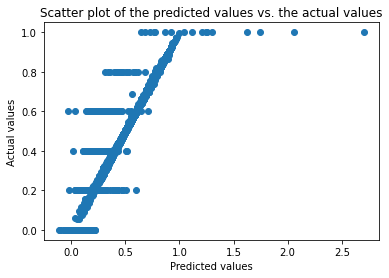

In [23]:

plt.scatter(y_pred, y_test_np)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatter plot of the predicted values vs. the actual values")
plt.show()

In [24]:
from sklearn.linear_model import Ridge
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.25)
model = Ridge(alpha=0.1)
model.fit(X_train_val, y_train_val)
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print('MSE on validation set:', mse_val)


MSE on validation set: 0.0038762542238714834


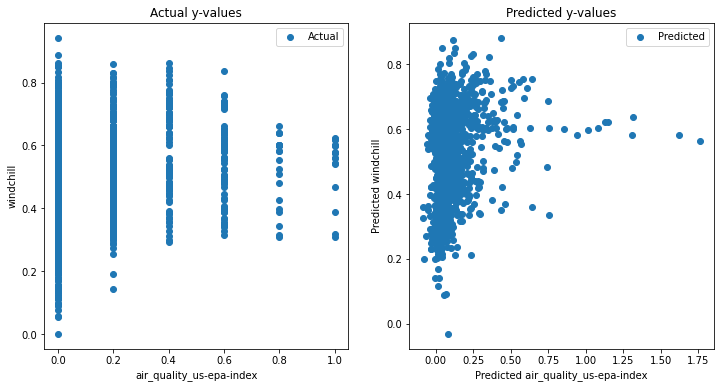

In [25]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(y_test['air_quality_us-epa-index'], y_test['windchill'], label='Actual')
ax1.set_xlabel('air_quality_us-epa-index')
ax1.set_ylabel('windchill')
ax1.set_title('Actual y-values')

ax2.scatter(y_pred_val[:, 0], y_pred_val[:, 2], label='Predicted')
ax2.set_xlabel('Predicted air_quality_us-epa-index')
ax2.set_ylabel('Predicted windchill')
ax2.set_title('Predicted y-values')
ax1.legend()
ax2.legend()
plt.show()

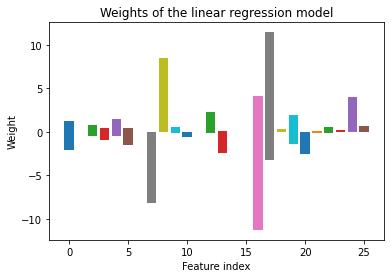

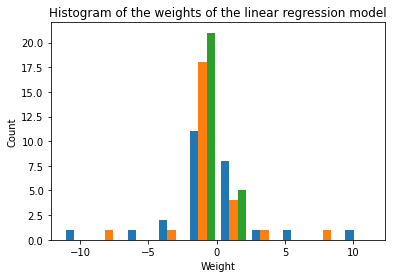

In [26]:

for i in range(len(w)):
    plt.bar(i, w[i])
plt.xlabel('Feature index')
plt.ylabel('Weight')
plt.title('Weights of the linear regression model')
plt.show()

plt.hist(w)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Histogram of the weights of the linear regression model')
plt.show()




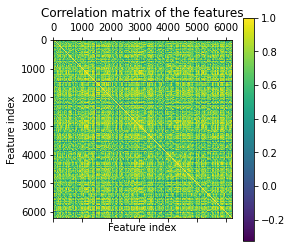

In [27]:
correlation_matrix = np.corrcoef(X_train)

plt.matshow(correlation_matrix)
plt.colorbar()
plt.xlabel('Feature index')
plt.ylabel('Feature index')
plt.title('Correlation matrix of the features')
plt.show()

In [28]:
print(y_train.shape)
print(X_train.shape)

(6220, 3)
(6220, 26)


In [29]:
y_test_np = y_test.to_numpy()
print(y_test_np)

[[0.2        0.7638191  0.60278924]
 [0.         0.33417085 0.26639395]
 [0.         0.33668342 0.33536729]
 ...
 [0.         0.43969849 0.42584143]
 [0.2        0.71356784 0.50445078]
 [0.         0.36934673 0.32004417]]


In [30]:
import matplotlib.pyplot as plt
columns_for_knn = ['air_quality_us-epa-index', 'dewpoint', 'windchill']
# columns_for_knn = ['windchill']
X_knn = df_cleaned.drop(columns=columns_for_knn)
Y_knn = df_cleaned[columns_for_knn]
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, Y_knn, test_size=0.25, random_state = 7)

K Nearest Neighbors

In [31]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_knn)
mse = np.mean((y_pred_knn - y_test_knn)**2)
print("Mean squared error:", mse)
# 0.017057
# 0.002647
# 0.001261

Mean squared error: air_quality_us-epa-index    0.019586
dewpoint                    0.002893
windchill                   0.001562
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [32]:
y_test_knn_np = y_test_knn.to_numpy()

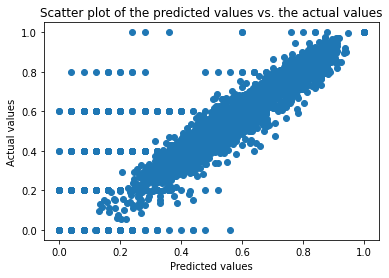

In [33]:
plt.scatter(y_pred_knn, y_test_knn_np)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatter plot of the predicted values vs. the actual values")
plt.show()

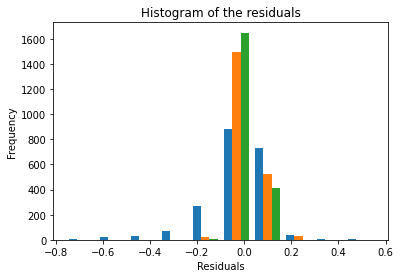

In [34]:
plt.hist(y_pred_knn - y_test_knn_np)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of the residuals")
plt.show()

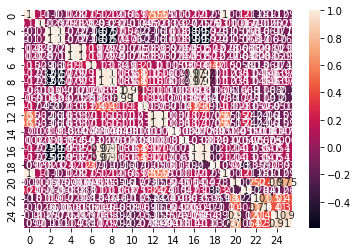

In [35]:
corr_matrix = np.corrcoef(X.T)
sns.heatmap(corr_matrix, annot=True)
plt.show()

K Means Clustering

In [36]:
wcss = []
clusters = 10
for i in range(1, clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=7)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)
print(wcss)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

[6534.687886929358, 5538.587608497825, 5000.811434799101, 4676.040440824744, 4362.56717252339, 4139.397920413618, 3973.991613149293, 3823.978021998387, 3689.4450386916474, 3563.4614276704983]


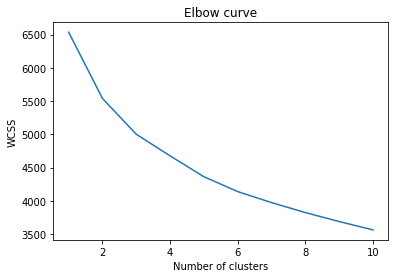

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(1, clusters+1), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SSE: wind_mph                              23.192510
wind_degree                          693.423051
pressure_mb                          188.764150
pressure_in                          178.098438
precip_mm                              6.809792
precip_in                              6.837691
cloud                                223.100016
feels_like_celsius                    57.099726
feels_like_fahrenheit                 57.200415
visibility_km                         49.365593
visibility_miles                      53.264531
uv_index                             149.836925
gust_mph                             149.040281
gust_kph                             148.670658
moon_phase                           539.810689
moon_illumination                    355.687306
normalized_temp_celsius               91.636656
normalized_temp_fahrenheit            91.639597
normalized_humidity                  324.665667
normalized_wind_kph                   23.228888
norm_air_quality_carbon_monoxide   

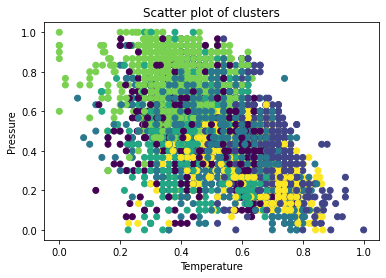

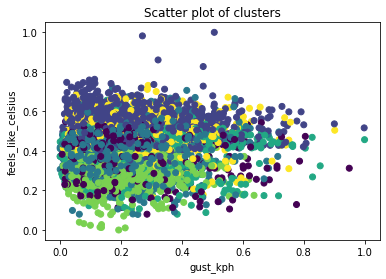

In [38]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
SSE = np.sum((X - kmeans.cluster_centers_[kmeans.predict(X)])**2)
print("SSE:", SSE)
plt.scatter(X['normalized_temp_celsius'], X['pressure_mb'], c=cluster_labels)
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Scatter plot of clusters")
plt.show()
plt.scatter(X['gust_kph'], X['feels_like_celsius'], c=cluster_labels)
plt.xlabel("gust_kph")
plt.ylabel("feels_like_celsius")
plt.title("Scatter plot of clusters")
plt.show()

In [39]:
print(df_cleaned['air_quality_us-epa-index'].dtypes)
print(df_cleaned['air_quality_us-epa-index'].shape)
print(df_cleaned['dewpoint'].dtypes)
print(df_cleaned['dewpoint'].shape)
print(df_cleaned['windchill'].dtypes)
print(df_cleaned['windchill'].shape)


float64
(8294,)
float64
(8294,)
float64
(8294,)


Naive Bayes

In [40]:
# columns_for_model = ['air_quality_us-epa-index', 'dewpoint', 'windchill']
columns_for_gnb = ['air_quality_us-epa-index']
le = LabelEncoder()
X_gnb = df_cleaned.drop(columns=columns_for_gnb)
Y_gnb = df_cleaned[columns_for_gnb]
y_gnb_encoded = le.fit_transform(Y_gnb)
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X_gnb, y_gnb_encoded, test_size=0.25, random_state=7)
gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train_gnb)
y_pred_gnb = gnb.predict(X_test_gnb)
accuracy = gnb.score(X_test_gnb, y_test_gnb)
matrix = confusion_matrix(y_test_gnb, y_pred_gnb)
print("Confusion matrix:")
print(matrix)
print('Accuracy:',accuracy)

Confusion matrix:
[[1267  114    0    1    0    0]
 [  20  392   30   10    0    2]
 [   0   18   79   13    0    2]
 [   0    0    5   74    4    4]
 [   0    0    0    0   13    9]
 [   0    0    0    0    2   15]]
Accuracy: 0.8871745419479267


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
# from sklearn.metrics import confusion_matrix, roc_curve, auc
# import seaborn as sns
# def plot_confusion_matrix(y_true, y_pred, labels):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.title('Confusion Matrix')
#     plt.show()
# plot_confusion_matrix(y_test_gnb, y_pred_gnb, le.classes_)

# # ROC curve plot
# fpr, tpr, _ = roc_curve(y_test_gnb, y_pred_gnb)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()

In [42]:
columns_for_gnb1 = ['dewpoint']
le = LabelEncoder()
X_gnb_1 = df_cleaned.drop(columns=columns_for_gnb1)
Y_gnb_1 = df_cleaned[columns_for_gnb1]
y_gnb_encoded_1 = le.fit_transform(Y_gnb_1)
X_train_gnb_1, X_test_gnb_1, y_train_gnb_1, y_test_gnb_1 = train_test_split(X_gnb_1, y_gnb_encoded_1, test_size=0.25, random_state=7)
gnb = GaussianNB()
gnb.fit(X_train_gnb_1, y_train_gnb_1)
y_pred_gnb_1 = gnb.predict(X_test_gnb_1)
accuracy_1 = gnb.score(X_test_gnb_1, y_test_gnb_1)
print('Accuracy:',accuracy_1)

Accuracy: 0.017357762777242044


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print(classification_report(y_test_gnb_1, y_pred_gnb_1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         2
          48       0.00      0.00      0.00         2
          50       0.00    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [44]:
columns_for_gnb2 = ['windchill']
le = LabelEncoder()
X_gnb_2 = df_cleaned.drop(columns=columns_for_gnb2)
Y_gnb_2 = df_cleaned[columns_for_gnb2]
y_gnb_encoded_2 = le.fit_transform(Y_gnb_2)
X_train_gnb_2, X_test_gnb_2, y_train_gnb_2, y_test_gnb_2 = train_test_split(X_gnb_2, y_gnb_encoded_2, test_size=0.25, random_state=7)
gnb = GaussianNB()
gnb.fit(X_train_gnb_2, y_train_gnb_2)
y_pred_gnb_2 = gnb.predict(X_test_gnb_2)
accuracy_2 = gnb.score(X_test_gnb_2, y_test_gnb_2)
matrix_2 = confusion_matrix(y_test_gnb_2, y_pred_gnb_2)
print("Confusion matrix:")
print(matrix_2)
print('Accuracy:',accuracy_2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.6880424300867888


In [45]:
print(classification_report(y_test_gnb_2, y_pred_gnb_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

Support Vector Machine

In [46]:
svm_regressor = SVR(kernel='linear')
multi_output_svm = MultiOutputRegressor(svm_regressor)
multi_output_svm.fit(X_train, y_train)
y_pred = multi_output_svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.007329551376996
R-squared: 0.7717883472134943


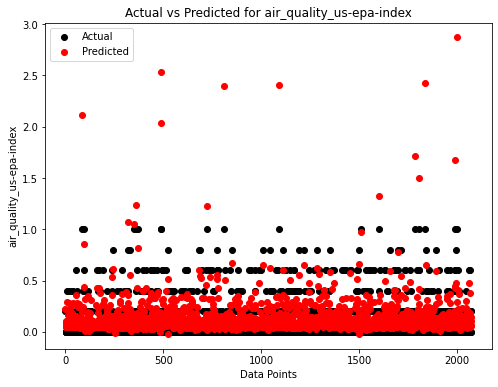

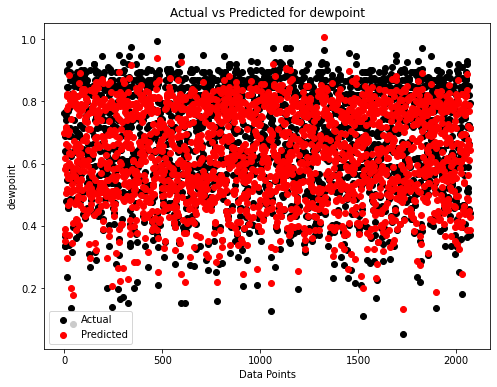

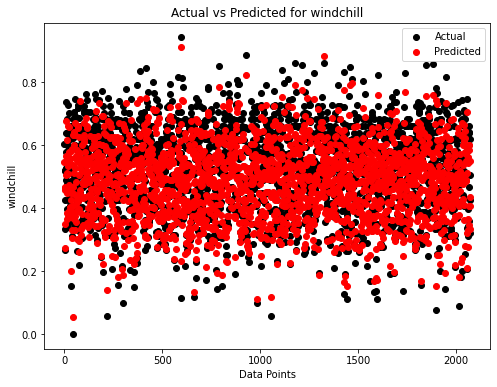

In [47]:
import matplotlib.pyplot as plt

for i in range(y_test.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_test)), y_test.iloc[:, i], color='black', label='Actual')
    plt.scatter(range(len(y_pred)), y_pred[:, i], color='red', label='Predicted')
    plt.title(f'Actual vs Predicted for {y_test.columns[i]}')
    plt.xlabel('Data Points')
    plt.ylabel(f'{y_test.columns[i]}')
    plt.legend()
    plt.show()


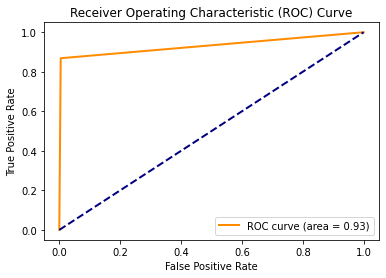

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

threshold = 0.5
y_test_binary = np.array([1 if val > threshold else 0 for val in y_test.values.flatten()])
y_pred_binary = np.array([1 if val > threshold else 0 for val in y_pred.flatten()])

fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


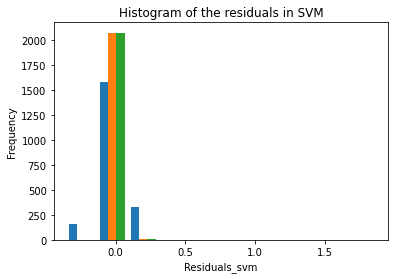

In [49]:
plt.hist(y_pred - y_test_knn_np)
plt.xlabel("Residuals_svm")
plt.ylabel("Frequency")
plt.title("Histogram of the residuals in SVM")
plt.show()

Random Forest

In [50]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9.823902412533158e-05
R-squared: 0.9964998489894038


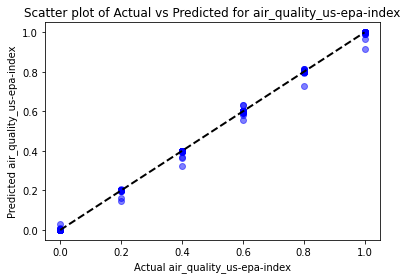

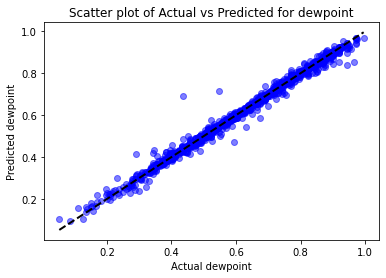

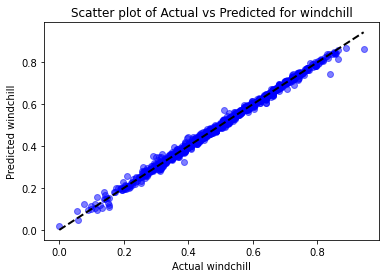

In [51]:
import matplotlib.pyplot as plt

for i in range(y_test.shape[1]):
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], color='b', alpha=0.5)
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', lw=2)
    plt.xlabel(f'Actual {y_test.columns[i]}')
    plt.ylabel(f'Predicted {y_test.columns[i]}')
    plt.title(f'Scatter plot of Actual vs Predicted for {y_test.columns[i]}')
    plt.show()


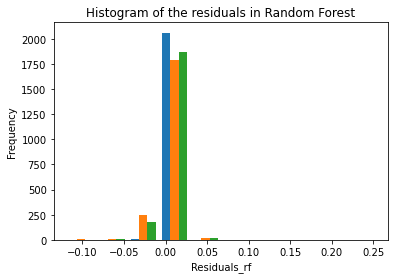

In [52]:
plt.hist(y_pred - y_test_knn_np)
plt.xlabel("Residuals_rf")
plt.ylabel("Frequency")
plt.title("Histogram of the residuals in Random Forest")
plt.show()

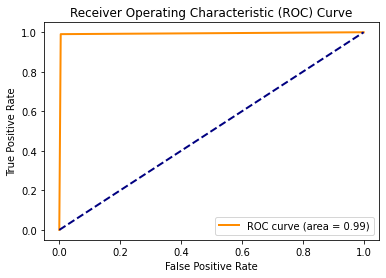

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

threshold = 0.5
y_test_binary = np.array([1 if val > threshold else 0 for val in y_test.values.flatten()])
y_pred_binary = np.array([1 if val > threshold else 0 for val in y_pred.flatten()])

fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Decision Tree

In [54]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.00022663630866380955
R-squared: 0.9917182279008663


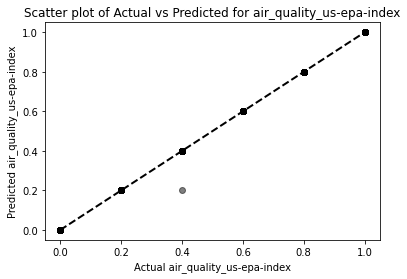

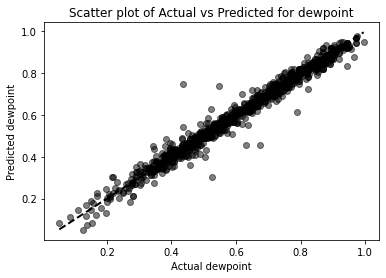

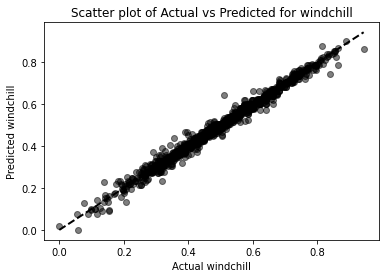

In [55]:
import matplotlib.pyplot as plt

for i in range(y_test.shape[1]):
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], color='black', alpha=0.5)
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', lw=2)
    plt.xlabel(f'Actual {y_test.columns[i]}')
    plt.ylabel(f'Predicted {y_test.columns[i]}')
    plt.title(f'Scatter plot of Actual vs Predicted for {y_test.columns[i]}')
    plt.show()

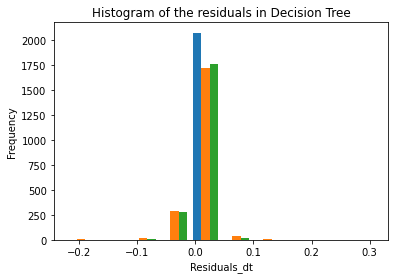

In [56]:
plt.hist(y_pred - y_test_np)
plt.xlabel("Residuals_dt")
plt.ylabel("Frequency")
plt.title("Histogram of the residuals in Decision Tree")
plt.show()

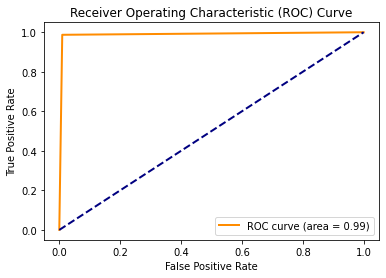

In [57]:
threshold = 0.5
y_test_binary = np.array([1 if val > threshold else 0 for val in y_test.values.flatten()])
y_pred_binary = np.array([1 if val > threshold else 0 for val in y_pred.flatten()])

fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()